## We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

In [11]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

Text(0, 0.5, 'Temperature')

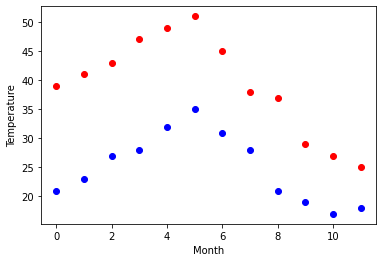

In [12]:
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [13]:
# Periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl*np.cos((times + time_offset)*1.8*np.pi/times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,min_temp, [-40, 20, 0])
print(res_max, res_min)
    

[ 39.10062829 -11.08724928   2.10332481] [24.87112259 -7.8989966   1.60673367]


Text(0, 0.5, 'Temperature')

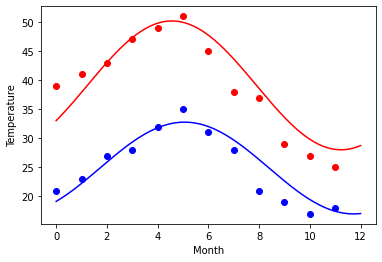

In [20]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

## matplotlib assignment

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 1. Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x17df1b6f040>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

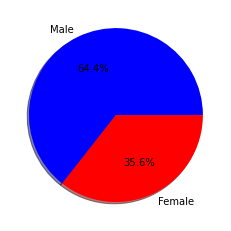

In [34]:
label = ['Male', 'Female']
sizes = df.sex.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=label, autopct='%1.1f%%',shadow=True, colors=['Blue', 'Red'])

## 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<AxesSubplot:xlabel='age', ylabel='fare'>

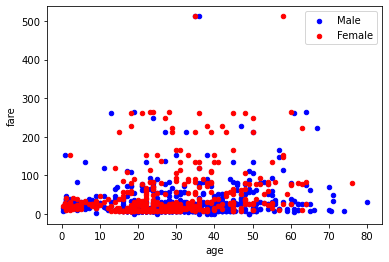

In [41]:
male = df[df.sex=='male'].plot.scatter('age', 'fare', color='blue', label= 'Male')
df[df.sex=='female'].plot.scatter('age', 'fare', color='red', label= 'Female', ax=male)